<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

# To Do


# Done



##Importação da Base de Dados

In [ ]:
!pip install googletrans
!pip install langdetect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import string
import re
# from googletrans import Translator
# from langdetect import detect
from textblob import TextBlob
import time
from collections import Counter
import nltk

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [ ]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [ ]:
qntd_linhas = df_original.shape[0]
qntd_colunas = df_original.shape[1]
print('Quantidade de linhas: ', qntd_linhas)
print('Quantidade de colunas: ', qntd_colunas)

Quantidade de linhas:  1658825
Quantidade de colunas:  13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo temos a lista dos nomes das colunas existentes:

In [ ]:
for col in df_original.columns:
  print(col)

data
usuario
apelido
texto
retweet
seguidores
idioma
lugar
pais
sigla
latitude
longitude
hashtags


Como pode ser observado abaixo, os tipos de variáveis que consistem o dataframe são *object*, *int64* e *float64*. As colunas com tipo *object* são aquelas com dados textuais. As colunas com tipo *int64* são as que contém dados quantitativos. As de tipo *float64* contém dados de números quebrados. 

In [ ]:
df_original.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

In [ ]:
df_original.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

Levando em consideração o achado acima, faz-se necessário o preenchimento apropriado para eliminar os espaços vazios presentes no dataset. Esta atividade é realizada na seção seguinte (Tratamento de Dados).

Para uma perspectiva visual da característica quantitativa dos atributos, foram plotados os gráficos a seguir:


In [ ]:
#Arrays com as quantidades de células não nulas e nulas, respectivamente, 
#de cada coluna que apresenta valores nulos
qntd_naonulos = [df_original.usuario.notnull().sum(),df_original.sigla.notnull().sum(),df_original.lugar.notnull().sum(),
           df_original.pais.notnull().sum(), df_original.latitude.notnull().sum(), 
           df_original.longitude.notnull().sum()]

qntd_nulos = [df_original.usuario.isnull().sum(), df_original.sigla.isnull().sum(), df_original.lugar.isnull().sum(),
                 df_original.pais.isnull().sum(), df_original.latitude.isnull().sum(), 
                 df_original.longitude.isnull().sum()]

#Array com labels para os gráficos a seguir
labels_valores_ausentes = ['Usuário', 'Sigla', 'Lugar', 'País', 'Latitude', 'Longitude']

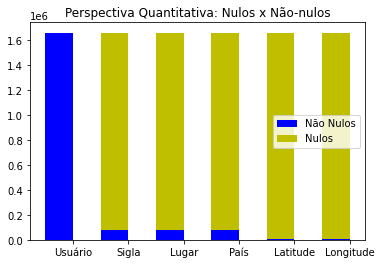

In [ ]:
# Range com a quantidade de itens das barras
x_pos = np.arange(len(qntd_naonulos))

first_bar = plt.bar(x_pos, qntd_naonulos, 0.5, color='b')
second_bar = plt.bar(x_pos, qntd_nulos, 0.5, color='y', bottom=qntd_naonulos)

# Definir posição e labels no eixo X
plt.xticks(x_pos+0.25, (labels_valores_ausentes))

plt.title("Perspectiva Quantitativa: Nulos x Não-nulos")
plt.savefig('qntd_nulos_naoNulos_barchar.png')
plt.legend(['Não Nulos', 'Nulos'],loc=5)
plt.show()

No que diz respeito à coluna *usuario*, sabe-se que existem 57 linhas que possuem valores. Por conta da grande quantidade de casos existentes (acima de 1 milhão), não é possível ver a barra inferior que contabiliza o total de nulos da coluna. 

Ademais, nota-se que: as quantidades para *sigla*, *lugar* e '*pais* são semelhantes; e que a base de casos possui pouquíssimas lacunas preenchidas com valores de latitude e longitude. 

Abaixo podemos observar a quantidade em porcentagem para as colunas que apresentam valores nulos. 

In [ ]:
#Gerador de cores aleatórias para os gráficos.
todas_as_cores = [k for k,v in pltc.cnames.items()]
fracs = np.array([600, 179, 154, 139, 126, 1185])

def gerar_cores_aleatorias():
  return sample(todas_as_cores, len(fracs))

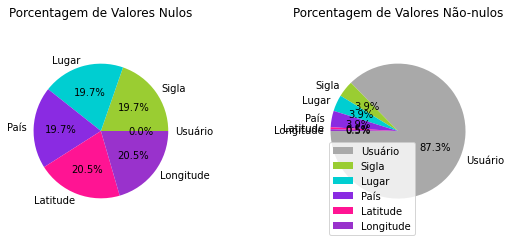

In [ ]:
# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

cores_aleatorias = gerar_cores_aleatorias()

# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(qntd_nulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', colors=cores_aleatorias)

# Define o título deste gráfico
eixos[0].set_title('Porcentagem de Valores Nulos')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(qntd_naonulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', startangle=180, colors=cores_aleatorias)
eixos[1].set_title('Porcentagem de Valores Não-nulos')
plt.axis('equal')

# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('qntd_nulos_naoNulos_piechar.png')
plt.legend(loc='lower left')
plt.show()

*idioma*, *sigla*, *pais* e *lugar* são atributos categróricos, isto é, caracterizam o tweet e/ou o usuário que postou o tweet. Como não houve restrição na coleta dedados quanto a localização e idioma, o dataset possui tweets do mundo todo como pode ser observado nas estatísticas abaixo, que apresentam os dez primeiros itens com maiores ocorrências:

In [ ]:
#Aquisição de lista de siglas dos idiomas e a quantidade de suas ocorrências
l_idiomas = df_original['idioma'].value_counts().to_frame()
l_idiomas = l_idiomas.rename(columns = {'idioma':'qntd_idioma'})
l_idiomas['porcentagem'] = round(((l_idiomas['qntd_idioma'] * 100)/df_original.shape[0]), 2)
l_idiomas['sigla_idioma'] = l_idiomas.index
l_idiomas.reset_index(drop=True, inplace=True)
l_idiomas = l_idiomas[['sigla_idioma','qntd_idioma','porcentagem']]

#Aquisição de lista de siglas dos países e a quantidade de suas ocorrências
l_siglas = df_original['sigla'].value_counts().to_frame()
l_siglas = l_siglas.rename(columns = {'sigla':'qntd_sigla'})
l_siglas['porcentagem'] = round(((l_siglas['qntd_sigla'] * 100)/df_original.shape[0]), 2)
l_siglas['sigla'] = l_siglas.index
l_siglas.reset_index(drop=True, inplace=True)
l_siglas = l_siglas[['sigla','qntd_sigla','porcentagem']]

#Aquisição de lista de nomes de países e a quantidade de suas ocorrências
l_paises = df_original['pais'].value_counts().to_frame()
l_paises = l_paises.rename(columns = {'pais':'qntd_pais'})
l_paises['porcentagem'] = round(((l_paises['qntd_pais'] * 100)/df_original.shape[0]), 2)
l_paises['pais'] = l_paises.index
l_paises.reset_index(drop=True, inplace=True)
l_paises = l_paises[['pais','qntd_pais','porcentagem']]

#Aquisição de lista de nomes dos lugares e a quantidade de suas ocorrências
#A lista foi delimitada para os lugares (identificados) com mais postagens
#Casos com valores nulos não foram considerados
l_lugares = df_original['lugar'].value_counts().to_frame()
l_lugares = l_lugares.rename(columns = {'lugar':'qntd_lugar'})
l_lugares['porcentagem'] = round(((l_lugares['qntd_lugar'] * 100)/df_original.shape[0]), 2)
l_lugares['lugar'] = l_lugares.index
l_lugares.reset_index(drop=True, inplace=True)
l_lugares = l_lugares[['lugar','qntd_lugar','porcentagem']]

In [ ]:
#Redução das listas geradas acima - organização por grupos de porcentagem

#Agrupamentos de porcentagens em idiomas
l_idiomas_resumido = l_idiomas['porcentagem'].value_counts().to_frame()
l_idiomas_resumido = l_idiomas_resumido.rename(columns = {'porcentagem':'qntd'})
l_idiomas_resumido['porcentagem'] = l_idiomas_resumido.index
l_idiomas_resumido.reset_index(drop=True, inplace=True)

#Agrupamentos de porcentagens em siglas
l_siglas_resumido = l_siglas['porcentagem'].value_counts().to_frame()
l_siglas_resumido = l_siglas_resumido.rename(columns = {'porcentagem':'qntd'})
l_siglas_resumido['porcentagem'] = l_siglas_resumido.index
l_siglas_resumido.reset_index(drop=True, inplace=True)

#Agrupamentos de porcentagens em países
l_paises_resumido = l_paises['porcentagem'].value_counts().to_frame()
l_paises_resumido = l_paises_resumido.rename(columns = {'porcentagem':'qntd'})
l_paises_resumido['porcentagem'] = l_paises_resumido.index
l_paises_resumido.reset_index(drop=True, inplace=True)

#Agrupamentos de porcentagens em lugares
l_lugares_resumido = l_lugares['porcentagem'].value_counts().to_frame()
l_lugares_resumido = l_lugares_resumido.rename(columns = {'porcentagem':'qntd'})
l_lugares_resumido['porcentagem'] = l_lugares_resumido.index
l_lugares_resumido.reset_index(drop=True, inplace=True)

In [ ]:
def agruparPorPorcentagens(df, df_geral, nome_coluna): 
  #df = o df reduzido
  #df_geral = o l_<nome da coluna no plural>
  #nome_coluna = nome da coluna de siglas/países/lugares

  titulos_agrupados = []

  for index, row in df.iterrows():
    string_concat = ''
    #define condição de busca para ser aplicada no dataframe genérico
    condicao = df_geral['porcentagem'] == row['porcentagem']
    lista = df_geral[condicao]

    for i, j in lista.iterrows():
      if (len(string_concat) > 0):
        string_concat = string_concat + ', ' + j[nome_coluna]
      else:
        string_concat = string_concat + j[nome_coluna]
    
    titulos_agrupados.append(string_concat)

  return titulos_agrupados

In [ ]:
print("Quantidade de siglas idiomáticas únicas: ", len(l_idiomas))
print('Relação de grupos de porcentagens para Idiomas:')
l_idiomas_resumido['grupos_idiomas'] = agruparPorPorcentagens(l_idiomas_resumido, l_idiomas, 'sigla_idioma')
l_idiomas_resumido[['grupos_idiomas', 'porcentagem', 'qntd']].sort_values(by='porcentagem', ascending=False)

Quantidade de siglas idiomáticas únicas:  59
Relação de grupos de porcentagens para Idiomas:


,grupos_idiomas,porcentagem,qntd
10,pt,95.66,1
14,en,1.45,1
6,es,0.86,1
12,it,0.39,1
5,und,0.34,1
15,ar,0.28,1
4,fr,0.22,1
7,ca,0.16,1
13,tr,0.14,1
8,ja,0.12,1


In [ ]:
print("Quantidade de países únicos:", len(l_paises))
print('Relação de grupos de porcentagens para Países:')
l_paises_resumido['grupos_paises'] = agruparPorPorcentagens(l_paises_resumido, l_paises, 'pais')
l_paises_resumido[['grupos_paises', 'porcentagem', 'qntd']].sort_values(by='porcentagem', ascending=False)

Quantidade de países únicos: 121
Relação de grupos de porcentagens para Países:


,grupos_paises,porcentagem,qntd
4,Brazil,4.05,1
6,Portugal,0.16,1
5,United States,0.06,1
3,Italy,0.03,1
2,"Spain, United Kingdom",0.02,2
1,"France, Argentina, Republic of Mozambique, Can...",0.01,8
0,"India, Mexico, Chile, Paraguay, Australia, Col...",0.00,107


In [ ]:
print("Quantidade de siglas únicas:", len(l_siglas))
print('Relação de grupos de Siglas:')
l_siglas_resumido['grupos_siglas'] = agruparPorPorcentagens(l_siglas_resumido, l_siglas, 'sigla')
l_siglas_resumido[['grupos_siglas', 'porcentagem', 'qntd']].sort_values(by='porcentagem', ascending=False)

Quantidade de siglas únicas: 120
Relação de grupos de Siglas:


,grupos_siglas,porcentagem,qntd
4,BR,4.05,1
6,PT,0.16,1
5,US,0.06,1
3,IT,0.03,1
2,"ES, GB",0.02,2
1,"FR, AR, MZ, CA, IE, DE, JP, AO",0.01,8
0,"IN, MX, CL, PY, AU, CO, CN, BE, NL, TR, CH, ZA...",0.00,106


In [ ]:
print("Quantidade de lugares únicos:", len(l_lugares))
print('Relação de grupos de Lugares:')
l_lugares_resumido['grupos_lugares'] = agruparPorPorcentagens(l_lugares_resumido, l_lugares, 'lugar')
l_lugares_resumido[['grupos_lugares', 'porcentagem', 'qntd']].sort_values(by='porcentagem', ascending=False)

Quantidade de lugares únicos: 4500
Relação de grupos de Lugares:


,grupos_lugares,porcentagem,qntd
13,Rio de Janeiro,0.51,1
10,Sao Paulo,0.45,1
8,Brasília,0.17,1
7,"Porto Alegre, Belo Horizonte",0.11,2
12,Curitiba,0.09,1
5,"Recife, Fortaleza, Belém",0.08,3
9,Salvador,0.07,1
11,Manaus,0.06,1
6,"Goiânia, São Luís",0.05,2
4,"Natal, Lisbon, Niterói, João Pessoa, Florianóp...",0.04,5


A respeito da relação quantidade de tweets por mês, temos o seguinte gráfico em barras:

In [ ]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [ ]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Março'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [ ]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

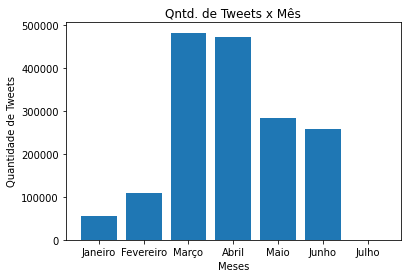

In [ ]:
#Quantidade de Tweets x mês

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gráfico acima, podemos observar que:

*   Conforme a COVID-19 é espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no mês de março, onde diversas metrópoles começam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um número alto de postagens. Trata-se do período em que cidades iniciam o período de quarentena e reforçam mensagens do protocolo de distanciamento social e higiene. 
*   Nos meses seguintes (maio e junho), há uma queda de aproximadamente 39,68%. Pode-se supor que a queda se dá pela transferência da menção textual ao vírus para menções audiovisuais (memes e vídeos, por exemplo) e/ou para menções que envolvam os termos #quarentena e #fiqueemcasa.




In [ ]:
#Não executar

# Range com a quantidade de itens das barras
x_pos = np.arange(len(df_original))

first_bar = plt.bar(x_pos, l_idiomas.sigla_idioma, 0.5, color='b')
second_bar = plt.bar(x_pos, l_siglas.sigla_idioma, 0.5, color='y', bottom=l_idiomas.sigla_idioma)

labels_atributos_categoricos = ['Idiomas', 'Siglas']

# Definir posição e labels no eixo X
plt.xticks(x_pos+0.25, (labels_atributos_categoricos))

plt.title("Perspectiva Quantitativa: Nulos x Não-nulos")
#plt.savefig('qntd__barchar.png')
plt.show()

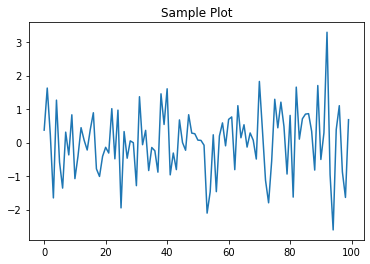

In [ ]:
y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y,  '-')
plt.fill_between(x, y, 200, where=(y > 195), facecolor = 'g', alpha = 0.6)
plt.title("Sample Plot")
plt.show()

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais* e *sigla*. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [ ]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi conferido que existem tweets repetidos. Para tanto, foi aplicada a função de remoção de linhas duplicadas.

In [ ]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', qntd_linhas - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas:', df_reduzida.shape[0], '.')

Ainda na busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Faz-se necessária a criação de uma outra coluna, **idioma_detectado**, com os reais idiomas do tweet. 

In [ ]:
#criação de uma coluna extra, para armazenar o idioma correto dos tweets
df_original['idioma_detectado'] = ''

**---------------------------------------------**

###**Identificação de pontos de interrogação**


#### Métodos para detecção das perguntas

In [ ]:
# Criando dataframe
df_textos = df_copia_original[['texto', 'idioma']].copy()

In [ ]:
def get_question_by_text(text):
  questions = []
  text = text.replace('\n', ' ')

  regular_expression = '(\S[^?.!]*[?!.]*)*'
  sentences = re.split(regular_expression, text)
  for sentence in sentences:
    if not sentence.isspace() and '?' in sentence:
      questions.append(sentence)
  return questions

def extract_questions(df_textos):
  dic = []
  for index, row in df_textos.iterrows():
    questions = get_question_by_text(row['texto'])
    for question in questions:
      dic.append({'id': index, 
                  'question': question,
                  'language': row['idioma']})
  
  df_questions = pd.DataFrame(dic, 
                              columns = ['id',
                                         'question',
                                         'language'])
  return df_questions

df_duvidas = extract_questions(df_textos)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [ ]:
# df_duvidas.head()
df_textos.iloc[45]['texto']

'Prioridade ?!\n\n #COVID19 #floripa #isolamento https://t.co/iKjchaimzn'

##Classificação de conteúdo

Os códigos das células abaixo mostarão as N (a ser definido pelo usuário) palavras/termos mais comuns dentre os tweets. Esse mecanismo foi utilizado para auxiliar na produção de um dicionário contendo palavras-chaves que indicarão a classificação do tweet em questão. 

In [ ]:
stopwords = set(line.strip() for line in open ('/content/drive/Shared drives/trabalhoPratico_programacaoDS/pt_stop_words.txt'))
stopwords = stopwords.union(set(['?','q','tá','pra','vc', 'gente', 'vcs', 'ta', 
                                 'cadê', 'ficar', 'pq', 'rt', '??', 'né', 'pro', 'to', 'n', '19', 'oq', 'já', 
                                 'ja', 'p', 'né', 'socia?', 'alguém', '-', '???', 'causa', 'falar', 'fazendo', 'não?', 'isso?', 'vou', 'tomar', 'tomou', 'cara', 'combate', 'algum', 'alguma', 'brasil?', 'brasil', 'sério', 'sair', 'pessoa', 'mesmo?', 'china', 'acabar', 'acabou' 
                                 'conta', 'pergunta', 'bem?', 'país', 'medo', 'tô', 'porra', '19?', 'fica', 
                                 'mano', 'plena', 'vacina', 'passar', 'é?', 'lockdown?', 'deus', 'fala', 'né?', ' ', 
                                 'pandemia?', 'cloroquina?', 'covid-19?', 'vírus?', 'quarentena?', 'socia?', 
                                 'coronavírus?', 'coronavirus?', 'acha', 'covid?', 'casos', 'saúde', 'uso', '????', 
                                 'senhor', 'pessoal', 'ninguém', 'ninguem', 'disse', 'agora?', 'ai', 'ajudar', 
                                 'quantas', 'the', 'hoje?', 'tava', 'virus?', 'teste', 'melhor', 
                                 'eh', 'tempos', 'realmente', 'mãe', 'deu', 'remédio', 'galera', 'quê?', 'sera', 
                                 'queria', 'existe', 'acham', 'tratamento', 'morrer', 'casa?', 'conta', 'social?', 
                                 'mundo', 'casa','lockdown', 'vamos', 'covid19?', 'hidroxicloroquina?', 'mortes', 
                                 'dias', 'viu', 'acabou', 'cura', 'que?', 'falando', 'quantos', 'crise', 'oi',
                                 'merda', 'mortos', 'precisa', 'pegou', 'imagina', 'chegou', 'hein?', 'ué', 
                                 'combater', 'la', 'falou', 'morreu', 'carnaval', 'you', 'noção', 'pós', 'máscara', 
                                 'pega', 'usando', 'daí?', 'daí', 'dai', '2', 'acho', 'morte', 'aí?']))

In [ ]:
#Instanciar um dicionário onde, para cada palavra contada, a palavra (inexistente no dict).
#Se já existir, sua contagem incrementa.

wordcount = {}

for index, row in df_duvidas.iterrows():
  for word in row['question'].lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [ ]:
# Print most common word
n_print = int(input("Informar a quantidade de palavras desejada: "))
print("As {} palavras mais mencionadas são as seguintes:".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

Acima temos as N palavras mais comuns nas perguntas identificadas. 

Abaixo, temos o dicionário gerado manualmente. Sua construção também base em pesquisas manuais a parte. 

In [ ]:
dict_categorias = {
'cura':'Medicamento',
'doença':'Doença',
'pandemia':'Doença',
'corona':'Doença',
'coronavírus':'Doença',
'coronavirus':'Doença',
'coronga':'Doença',
'covid-19':'Doença',
'covid19':'Doença',
'covid':'Doença',
'sars-cov-2':'Doença',
'tratamento':'Medicamento',
'curar':'Medicamento',
'cloroquina':'Medicamento',
'hidroxicloroquina':'Medicamento',
'ministro':'Pessoas',
'ministério':'Organizações',
'emissora':'Organizações',
'jornal':'Organizações',
'Jornal':'Organizações',
'contra':'Medicamento',
'combate': 'Medicamento',
'especialista':'Pessoas',
'mandetta':'Pessoas',
'melhora':'Medicamento',
'sintoma':'Doença',
'sintomas':'Doença',
'caso':'Doença',
'casos':'Doença',
'vacina':'Medicamento',
'vacinas':'Medicamento',
'tamiflu':'Medicamento',
'covidao':'Doença',
'infecção': 'Doença',
'contágio':'Doença',
'atazanavir':'Medicamento',
'remdesivir':'Medicamento',
'ivermectina':'Medicamento',
'azitromicina':'Medicamento',
'who':'Organizações',
'oms':'Organizações',
'organização mundial da saúde':'Organizações',
'profissionais da saúde':'Pessoas',
'coriza':'Doença',
'dor':'Doença',
'falta de ar': 'Doença',
'febre':'Doença',
'tosse':'Doença',
'fiocruz':'Organizações',
'fundação nacional da saúde': 'Organizações',
'funasa':'Organizações',
'opas':'Organizações',
'organização pan-americana da saúde': 'Organizações',
'teich':'Pessoas',
'etienne':'Pessoas',
'@jairbolsonaro':'Pessoas',
'bolsonaro':'Pessoas',
'@lhmandetta':'Pessoas',
'vírus':'Doença',
'@jdoriajr':'Pessoas',
'doria':'Pessoas',
'dória':'Pessoas',
'@bolsonarosp':'Pessoas',
'@veramagalhaes':'Pessoas',
'@minsaude':'Organizações',
'@folha':'Organizações',
'@estadao':'Organizações',
'folha':'Organizações',
'Estadão':'Organizações',
'@rodrigomaia':'Pessoas',
'@g1':'Organizações',
'g1':'Organizações',
'@teichnelson':'Pessoas',
'@wilsonwitzel':'Pessoas',
'@o_antagonista':'Pessoas',
'@cnnbrasil':'Organizações',
'@rconstantino':'Pessoas',
'@uolnoticias':'Organizações',
'ivermectina':'Medicamento',
'@osmarterra':'Pessoas',
'@carlosbolsonaro':'Pessoas',
'@bbcbrasil':'Orgnizações'
}

A função classificador() recebe a pergunta e cada palavra da frase é comparada aos termos existentes no dicionário. Se der match, o retorno é a categoria respectiva da palavra. Caso não haja match, a categoria devolvida é *Outro*, que pode ser definida por diversas peculiaridades (a pergunta está em outro idioma, o contexto não faz referência direta ao vírus, etc.).

In [ ]:
#Função classificadora de tuítes
#Recebe o texto do tuíte e retorna a classificação

def classificador(texto):
  t = texto.split()
  #t = t[:-1] #para desconsiderar o ponto de interrogação no final da frase

  for palavra in t:
    l = len(palavra)
    if ( palavra[l-1] == '?'):
      palavra = palavra[:-1]
      
    for key, value in dict_categorias.items():
      if ( palavra.lower() == key):
        return value
  #no caso de não ter retornado nada no for
  return 'Outro'

Abaixo temos o dataframe atualizado com as categorias das suas respectivas perguntas. 

In [ ]:
df_duvidas['category'] = df_duvidas.apply(lambda row: classificador(row['question']), axis = 'columns')

##**Análise temporal**


In [ ]:
# Criar dataframe
df_textos = df_copia_original.copy()